# HAMOYE DATASCIENCE TRAINING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline


In [2]:
#load the csv dataset provided.
data = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')


### Information About Dataset

The data provided in this Github link is the fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:

'Record_id' : record id

'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

In [3]:
#Save dataset to csv on your local disk for future usage in the absence of internet connection
data.to_csv('data.csv', index=False)

In [4]:
#Reload dataset from local memory
data = pd.read_csv('data.csv')

### Understand The Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.0+ MB


The above information shows that there are some continous columns and categorical columns

In [6]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [7]:
#Shows the list of columns in the dataset
data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [8]:
"""Shows the dimension of dataset.
From the information, there are 29523 rows and 11 columns in the data provided."""
data.shape

(29523, 11)

In [9]:
#Check for cells with NaN
data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

Fuel Unit contains about 180 null cells.

In [10]:
#Print the top first data points.
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [11]:
#Print the last 5 data points
data.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


## Univariate Analysis

- ###  utility_id_ferc1 : Utility id assigned by the FERC

In [12]:
data['utility_id_ferc1'].unique()

array([  1,   2,   4,   6,   7,   9,  10,  11,  12,  15,  16,  17,  20,
        24,  26, 191,  31,   8,  42,  43,  44,  46,  50,  51,  54,  55,
        38,  73,  81, 127,  19,  36,  61,  63,  64,  68,  70,  72,  74,
        75,  77,  79,  80,  85,  96,  97,  98,  99,  27,  30,  52, 135,
        69,  87,  88, 121, 122, 102, 193, 194, 125, 126, 128, 129, 130,
       131, 132, 134, 137, 141, 142, 143, 145, 117, 146, 150, 151, 157,
       114, 115, 118, 161, 162, 163, 164, 166, 169, 170, 173, 176, 177,
       179, 182, 185, 186, 187, 188, 189,  33,  89, 200, 201, 204, 208,
       159, 119,  25,  49, 108, 155, 100, 107, 144, 116, 136,  67,  82,
        95, 133, 138, 148, 190,  56, 113,  32, 120, 147, 160, 175,  22,
        39,  62,  76, 101, 124, 154, 156, 174, 195, 104,  14,  57,  41,
        45, 149, 213, 210,  29,  94, 230,  71,  21, 202, 244, 226, 227,
        65, 171, 181, 221, 266, 245, 270, 276, 203, 271, 283, 281, 285,
       287, 196, 288, 294, 262, 178,  58, 432, 315, 403, 449, 45

In [13]:
data['utility_id_ferc1'].value_counts()

194    1224
186     981
195     826
134     786
44      746
       ... 
283       2
208       2
513       2
285       1
287       1
Name: utility_id_ferc1, Length: 185, dtype: int64

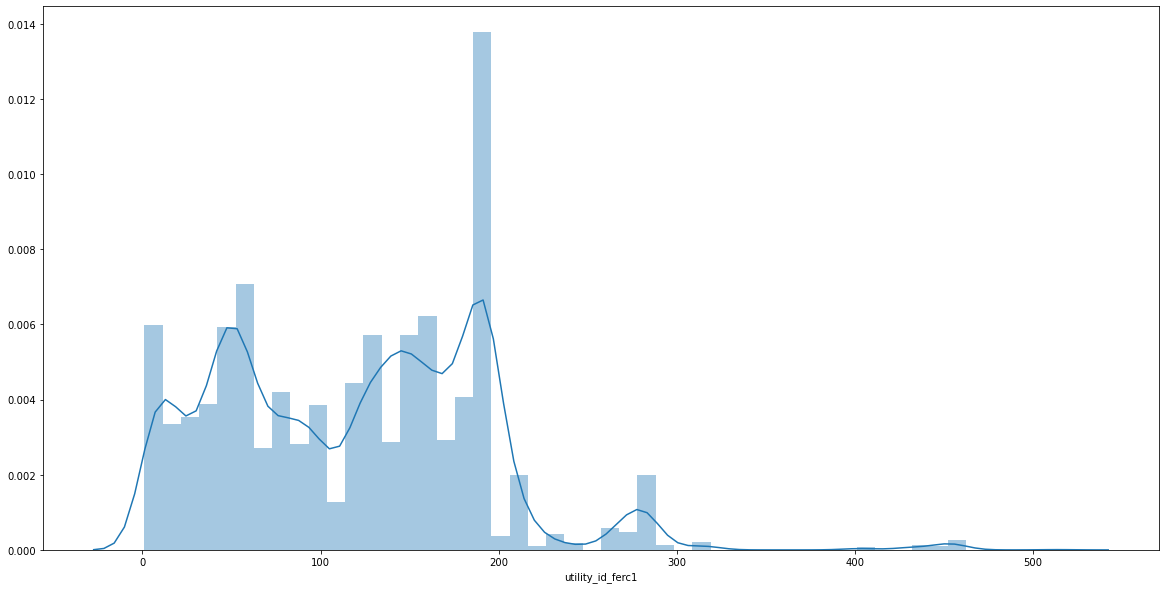

In [14]:
plt.figure(figsize=(20,10))
sns.distplot(data['utility_id_ferc1'])

(array([1812., 1014., 1072., 1176., 1797., 2144.,  821., 1276.,  857.,
        1167.,  388., 1345., 1735.,  871., 1735., 1886.,  882., 1236.,
        4173.,  110.,  603.,   29.,  128.,   55.,    0.,  176.,  143.,
         600.,   43.,    0.,   66.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   24.,    0.,    0.,   42.,   35.,   77.,
           0.,    0.,    0.,    0.,    5.]),
 array([  1.  ,  11.26,  21.52,  31.78,  42.04,  52.3 ,  62.56,  72.82,
         83.08,  93.34, 103.6 , 113.86, 124.12, 134.38, 144.64, 154.9 ,
        165.16, 175.42, 185.68, 195.94, 206.2 , 216.46, 226.72, 236.98,
        247.24, 257.5 , 267.76, 278.02, 288.28, 298.54, 308.8 , 319.06,
        329.32, 339.58, 349.84, 360.1 , 370.36, 380.62, 390.88, 401.14,
        411.4 , 421.66, 431.92, 442.18, 452.44, 462.7 , 472.96, 483.22,
        493.48, 503.74, 514.  ]),
 <a list of 50 Patch objects>)

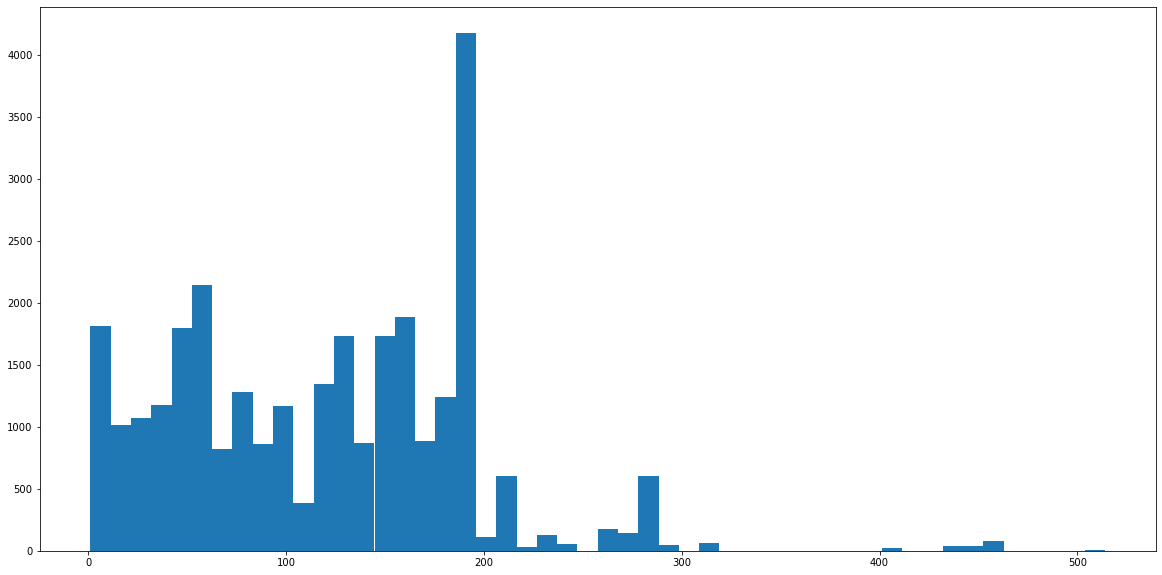

In [15]:
plt.figure(figsize=(20,10))
plt.hist(data['utility_id_ferc1'], bins=50)

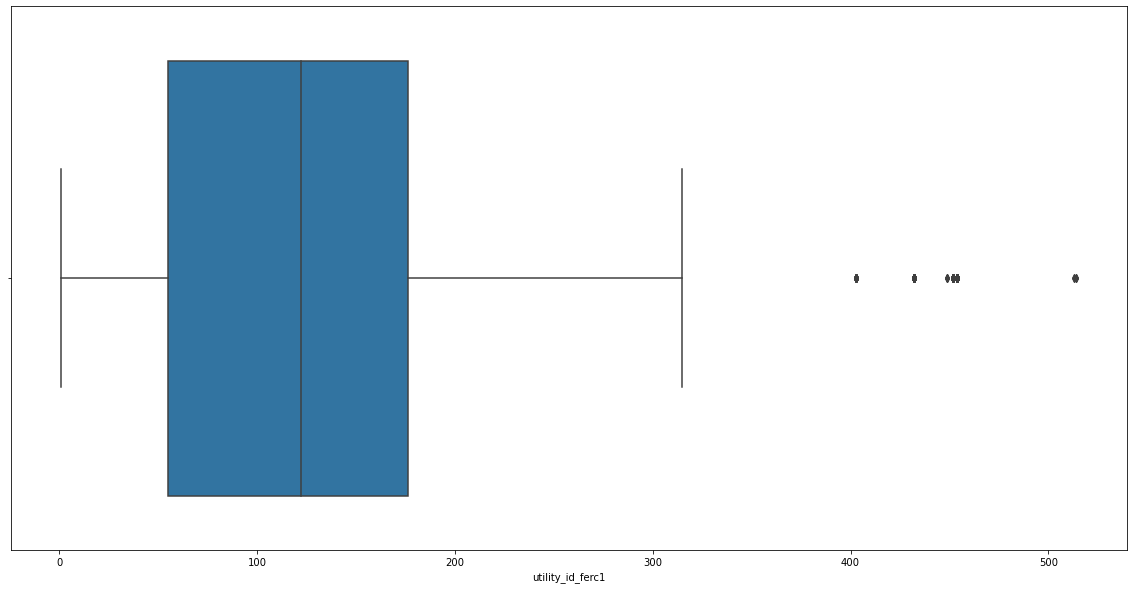

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(data['utility_id_ferc1'])

- ### report_year : year of report


In [17]:
data['report_year'].unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018], dtype=int64)

In [18]:
data['report_year'].value_counts()

2000    1373
2001    1356
2005    1269
2007    1264
2010    1261
2006    1243
2012    1243
2011    1240
1994    1235
2008    1228
2009    1222
2003    1211
2002    1205
1995    1201
2013    1199
2004    1192
2014    1171
1998    1107
1997    1094
2015    1093
1996    1088
1999    1050
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

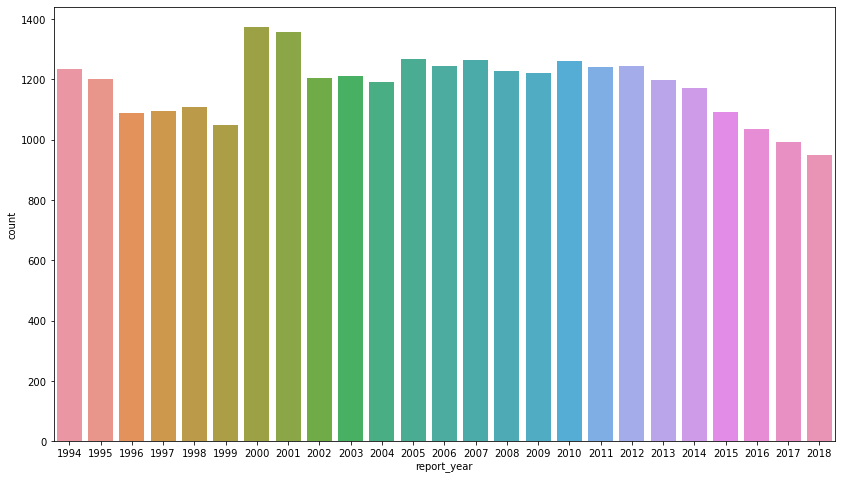

In [19]:
plt.figure(figsize=(14,8))
sns.countplot(data['report_year'])

- ### plant_name_ferc1 : the name of the plant

In [20]:
data['plant_name_ferc1'].unique()

array(['rockport', 'rockport total plant', 'gorgas', ...,
       'airport unit 6', 'wyodak - bhp 20%', 'wygen 3 bhp 52%'],
      dtype=object)

In [21]:
data['plant_name_ferc1'].value_counts()

big stone              156
four corners           151
riverside              133
coyote                 121
louisa                 119
                      ... 
cross road               1
n.t.c. gt                1
columbia 1 (*)           1
resondent's portion      1
sr bertron               1
Name: plant_name_ferc1, Length: 2315, dtype: int64

- ### fuel_type_code_pudl : the type of fuel

In [22]:
data['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [23]:
data['fuel_type_code_pudl'].value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

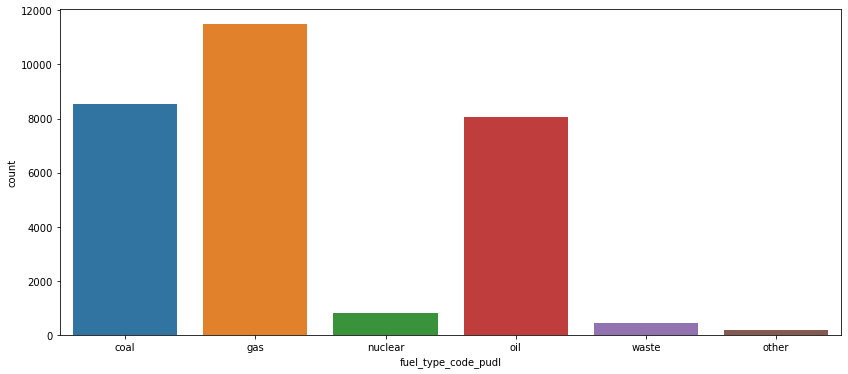

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(data['fuel_type_code_pudl'])

- ### fuel_unit : the unit of fuel

In [25]:
data['fuel_unit'].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [26]:
data['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

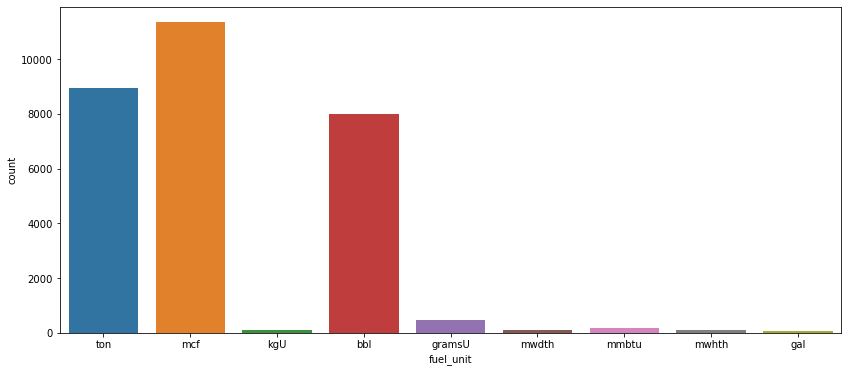

In [27]:
plt.figure(figsize=(14,6))
sns.countplot(data['fuel_unit'])

In [28]:
data['utility_id_ferc1'].value_counts()

194    1224
186     981
195     826
134     786
44      746
       ... 
283       2
208       2
513       2
285       1
287       1
Name: utility_id_ferc1, Length: 185, dtype: int64

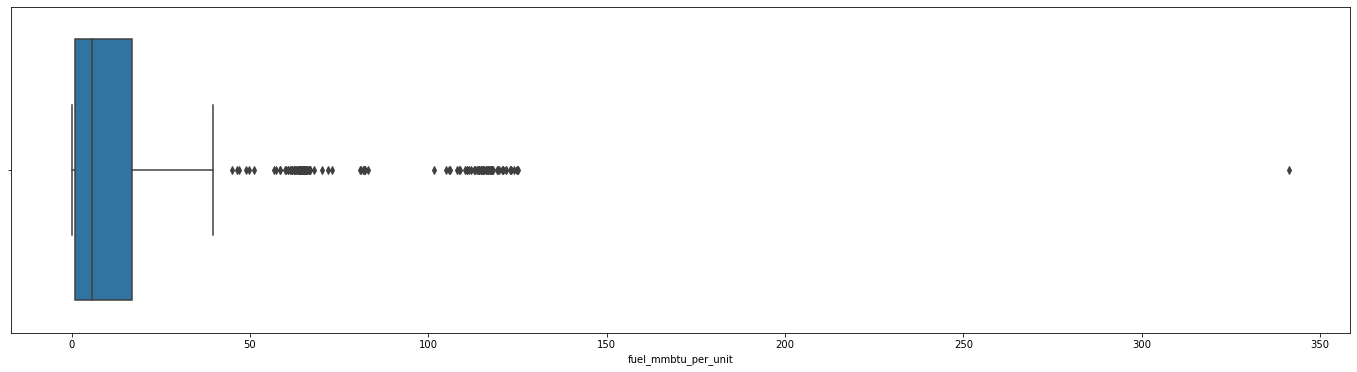

In [29]:
plt.figure(figsize=(24,6))
sns.boxplot(data['fuel_mmbtu_per_unit'])

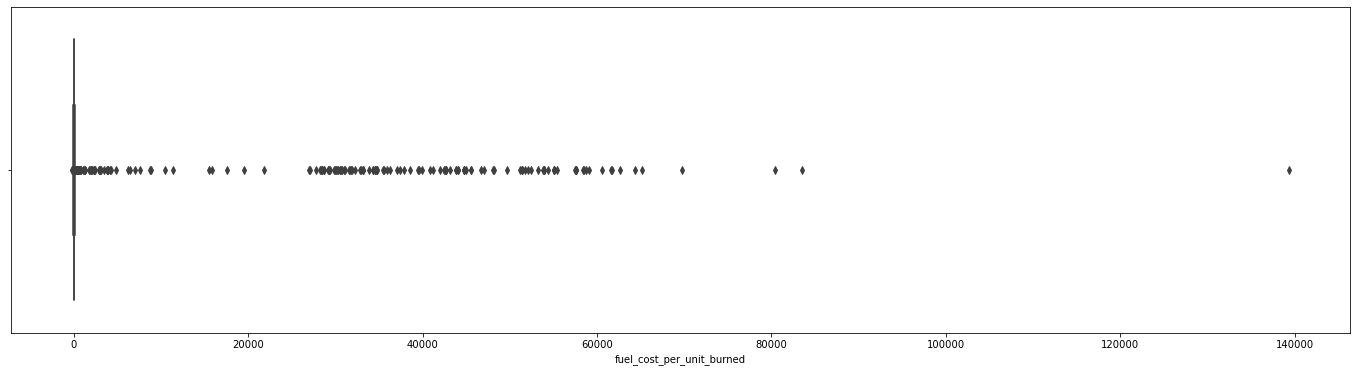

In [30]:
plt.figure(figsize=(24,6))
sns.boxplot(data['fuel_cost_per_unit_burned'])

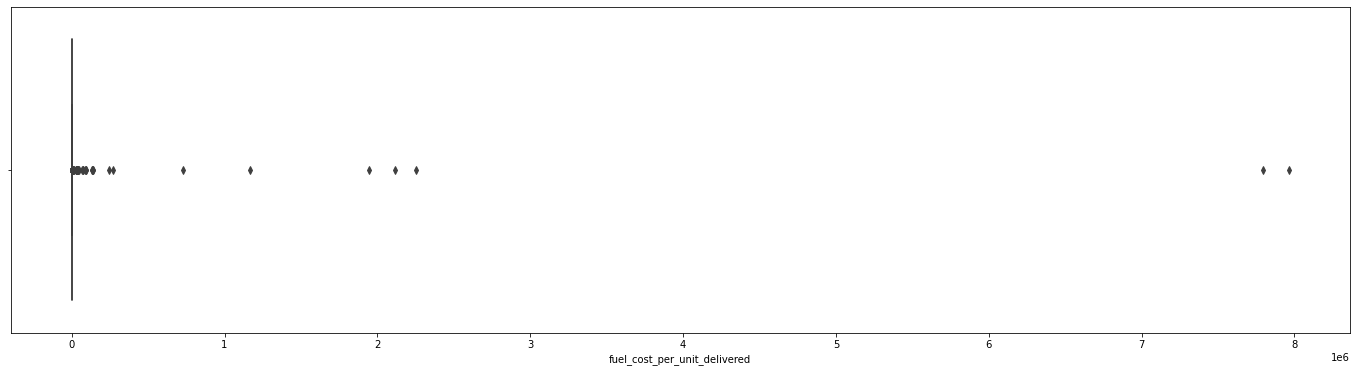

In [31]:
plt.figure(figsize=(24,6))
sns.boxplot(data['fuel_cost_per_unit_delivered'])

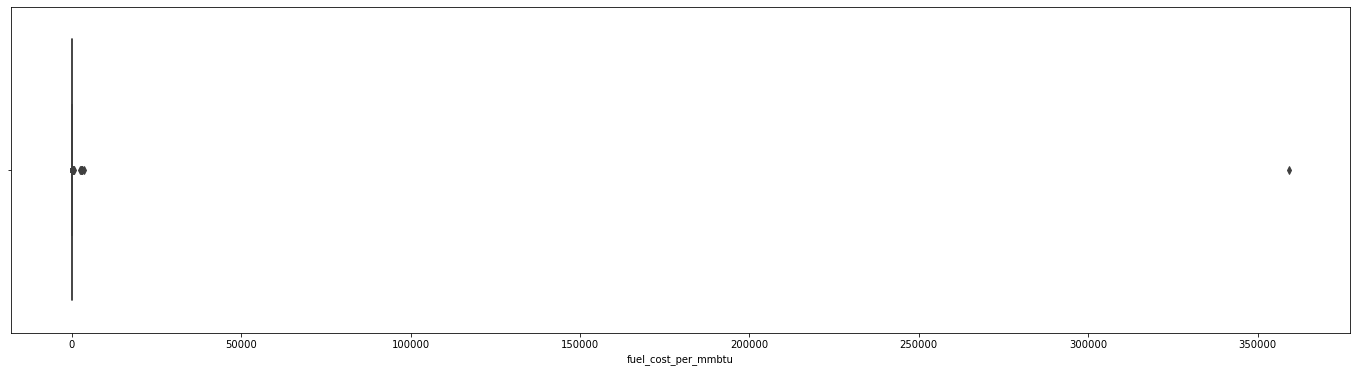

In [32]:
plt.figure(figsize=(24,6))
sns.boxplot(data['fuel_cost_per_mmbtu'])

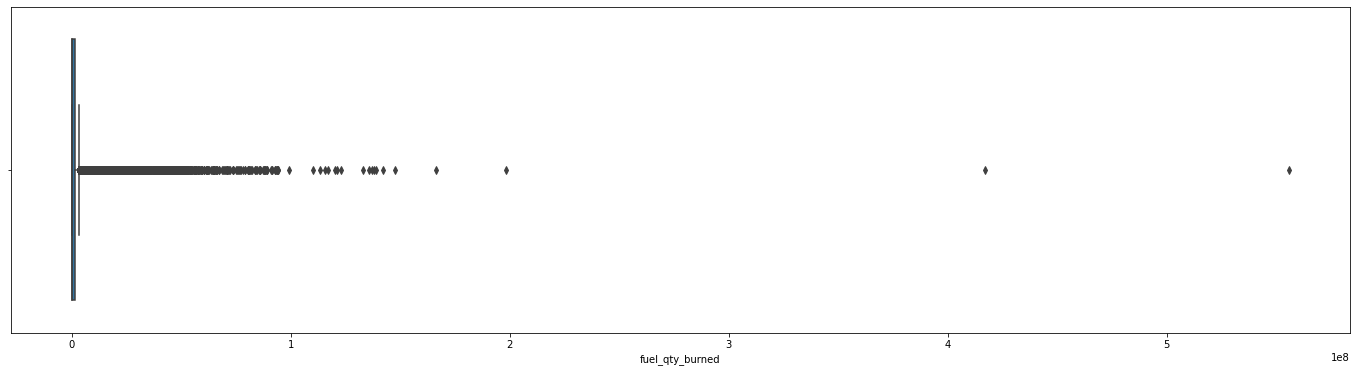

In [33]:
plt.figure(figsize=(24,6))
sns.boxplot(data['fuel_qty_burned'])

The EDA above shows outliers using a box plot. I will handle the outliers later.

In [34]:
data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [35]:
data[data['report_year']== 1995]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
1235,f1_fuel_1995_12_200_0_1,200,1995,aroostook valley,waste,ton,327060.0,0.0045,0.000,13.150,1.460
1236,f1_fuel_1995_12_115_0_1,115,1995,goudey,coal,ton,209497.0,26.6760,40.384,34.769,1.507
1237,f1_fuel_1995_12_115_0_4,115,1995,greenidge,coal,ton,267241.0,26.0760,38.293,34.283,1.469
1238,f1_fuel_1995_12_115_0_7,115,1995,jennison,coal,ton,123860.0,22.8700,39.807,37.143,1.741
1239,f1_fuel_1995_12_115_0_10,115,1995,hickling,coal,ton,235405.0,20.0900,27.829,28.485,1.386
...,...,...,...,...,...,...,...,...,...,...,...
2431,f1_fuel_1995_12_45_1_13,45,1995,riverbend,gas,mcf,49535.0,1.0330,3.096,3.096,2.768
2432,f1_fuel_1995_12_45_2_1,45,1995,buck,coal,ton,171503.0,24.3500,39.590,40.830,1.626
2433,f1_fuel_1995_12_45_2_4,45,1995,buck,gas,mcf,57596.0,1.0330,2.888,2.888,2.747
2434,f1_fuel_1995_12_45_2_7,45,1995,buzzard r.,gas,mcf,85296.0,1.0320,3.690,3.690,3.565


### Multivariate Analysis

#### Comparing the yearly amount of burned fuel

In [36]:
#Group data by year
a = data.groupby(['report_year'])


In [37]:
grouped_by_year ={}
for group in a:
#     print(group[1])
    b = group[1].groupby('fuel_type_code_pudl').sum()['fuel_qty_burned']
    grouped_by_year[group[0]]=b

In [38]:
grouped_by_year

{1994: fuel_type_code_pudl
 coal       7.172082e+08
 gas        2.432212e+09
 nuclear    2.069366e+08
 oil        1.469716e+06
 other      5.094458e+06
 waste      1.242241e+06
 Name: fuel_qty_burned, dtype: float64,
 1995: fuel_type_code_pudl
 coal       1.257398e+09
 gas        2.570880e+09
 nuclear    2.054081e+08
 oil        8.091780e+05
 other      4.220548e+08
 waste      1.642051e+06
 Name: fuel_qty_burned, dtype: float64,
 1996: fuel_type_code_pudl
 coal       6.988514e+08
 gas        1.915218e+09
 nuclear    1.487384e+08
 oil        3.637754e+06
 other      1.144943e+06
 waste      1.102632e+06
 Name: fuel_qty_burned, dtype: float64,
 1997: fuel_type_code_pudl
 coal       8.169024e+08
 gas        2.039925e+09
 nuclear    1.625564e+08
 oil        5.384931e+07
 other      3.211371e+06
 waste      1.528774e+06
 Name: fuel_qty_burned, dtype: float64,
 1998: fuel_type_code_pudl
 coal       8.982095e+08
 gas        2.554651e+09
 nuclear    1.504636e+08
 oil        5.436080e+05
 othe

In [39]:
grouped_by_year[1994]


fuel_type_code_pudl
coal       7.172082e+08
gas        2.432212e+09
nuclear    2.069366e+08
oil        1.469716e+06
other      5.094458e+06
waste      1.242241e+06
Name: fuel_qty_burned, dtype: float64

In [42]:
year =[]
fuel = []
total_fuel =[]
for i in grouped_by_year:
    for j, k in grouped_by_year[i].items():
        year.append(i)
        fuel.append(j)
        total_fuel.append(k)

In [43]:
database = {'year':year, 'fuel':fuel, 'total_fuel_burned_per_year':total_fuel}

In [44]:
year_fuel = pd.DataFrame(database)

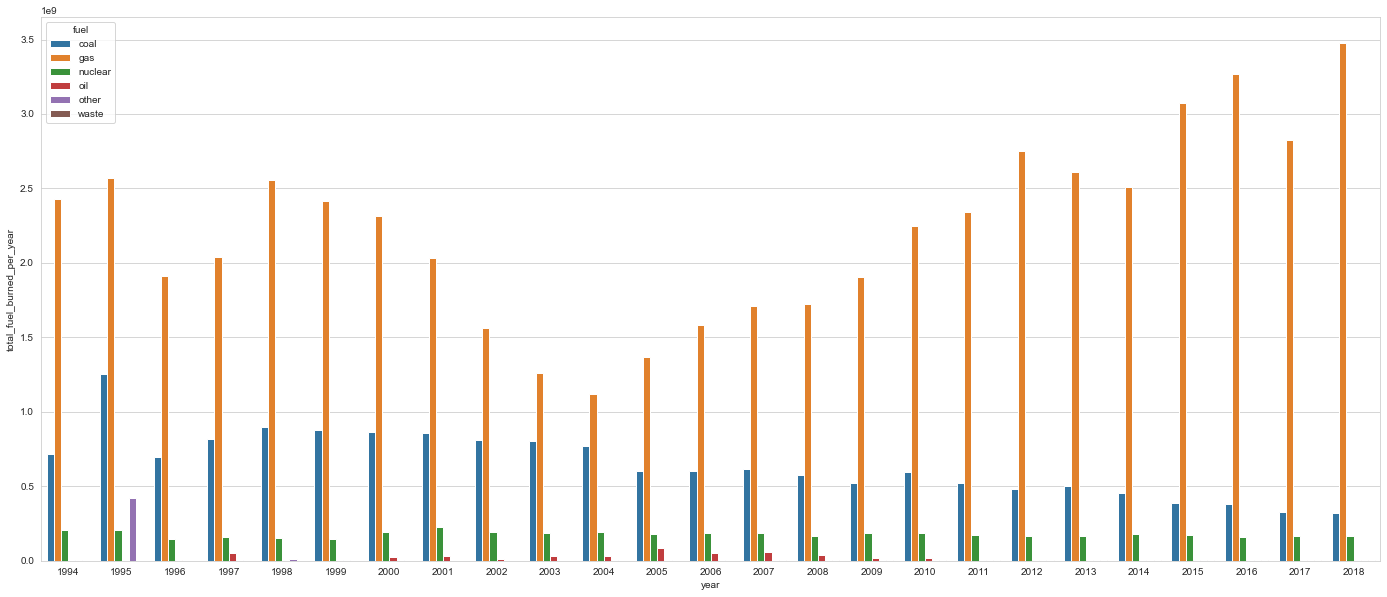

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize = (24, 10))
sns.barplot(x='year', y='total_fuel_burned_per_year', hue='fuel', data=year_fuel)

The major inference from this analysis shows that the amount of coal burned reduced yearly. This can be attributed to increase campaign about climate change and clean energy.  Gas remains the major source of energy.

In [46]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


The information shows there are negative values for some columns. Lets look into that

In [48]:
data[data['fuel_cost_per_mmbtu']<0]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
434,f1_fuel_1994_12_121_0_14,121,1994,french island,waste,ton,51728.0,0.005846,-35.100,-35.380,-3.003
516,f1_fuel_1994_12_194_5_9,194,1994,rock river,waste,ton,4650.0,0.014370,-57.450,-58.800,-2.000
518,f1_fuel_1994_12_194_5_12,194,1994,rock river unit 2,waste,ton,4231.0,0.014668,-57.490,-58.800,-1.959
520,f1_fuel_1994_12_194_5_15,194,1994,rock river units 1&2,waste,ton,8881.0,0.014512,-57.470,-58.800,-1.980
2117,f1_fuel_1995_12_194_4_9,194,1995,nelson dewey unit 1,waste,ton,1047.0,0.013429,-53.630,-53.560,-1.996
2119,f1_fuel_1995_12_194_4_12,194,1995,nelson dewey unit 2,waste,ton,869.0,0.013429,-53.630,-53.560,-1.996
2121,f1_fuel_1995_12_194_4_15,194,1995,nelson dewey 1 & 2,waste,ton,1916.0,0.013429,-53.630,-53.560,-1.996
2123,f1_fuel_1995_12_194_5_9,194,1995,rock river unit 1,waste,ton,6072.0,0.013457,-85.760,-85.640,-3.186
2125,f1_fuel_1995_12_194_5_12,194,1995,rock river unit 2,waste,ton,5377.0,0.013417,-85.750,-85.640,-3.195
2334,f1_fuel_1995_12_121_0_14,121,1995,french island,waste,ton,47190.0,0.006042,-42.679,-42.290,-3.532


In [49]:
data[data['fuel_cost_per_mmbtu']<0].shape

(39, 11)

Exploring the data for negative values for the column 'fuel_cost_per_mmbtu'. Discovered that all the data points with negative values for 'fuel_cost_per_mmbtu' also have negative values for 'fuel_cost_per_unit_burned'  and 'fuel_cost_per_unit_delivered'.
The are about 39 data points for these values.I will remove them and see if they i have reed my dataset of negatives.

In [50]:
data_new = data[data['fuel_cost_per_mmbtu']>0]

In [51]:
data_new.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29384.000000,29384.000000,2.938400e+04,29384.000000,29384.000000,2.938400e+04,29384.000000
mean,118.556970,2005.840866,2.631282e+06,8.527408,209.686606,9.219649e+02,19.400321
std,74.223114,7.019045,9.134131e+06,10.596826,2861.192699,6.893838e+04,2096.481770
min,1.000000,1994.000000,1.000000e+00,0.000001,0.000000,-8.749370e+02,0.043000
25%,55.000000,2000.000000,1.383375e+04,1.024000,5.260000,3.830000e+00,1.963750
50%,122.000000,2006.000000,2.565075e+05,5.765298,26.220000,1.779550e+01,4.160000
75%,176.000000,2012.000000,1.430289e+06,17.034000,47.236000,4.228000e+01,7.770000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


The 'fuel_cost_per_unit_delivered' column still has some negative values. Let's check that out.

In [52]:
data_new[data_new['fuel_cost_per_unit_delivered']<0]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
7737,f1_fuel_2000_12_194_3_7,194,2000,rock river unit 1,coal,ton,1044.0,19.300000,41.990,-14.240,2.176
7739,f1_fuel_2000_12_194_3_13,194,2000,rock river unit 2,coal,ton,809.0,19.300000,45.160,-14.240,2.340
7742,f1_fuel_2000_12_194_4_4,194,2000,rock river units 1&2,coal,ton,1853.0,19.300000,43.370,-14.240,2.247
12975,f1_fuel_2004_12_210_1_6,210,2004,sycamore,oil,bbl,588.0,5.712420,38.722,-313.410,6.779
16634,f1_fuel_2007_12_177_2_4,177,2007,mexico c.t.,oil,bbl,2240.0,5.754000,77.605,-488.054,13.487
17525,f1_fuel_2008_12_177_1_1,177,2008,mexico c.t.,oil,bbl,811.0,5.754000,86.628,-874.937,15.055
17585,f1_fuel_2008_12_266_0_15,266,2008,meredosia,oil,bbl,18711.0,5.867610,166.370,-62.290,28.354
20296,f1_fuel_2010_12_55_3_10,55,2010,bartow,oil,bbl,4618.0,5.764164,107.039,-7.295,18.570
20987,f1_fuel_2011_12_42_0_2,42,2011,f. m. tait,oil,bbl,237.0,5.756772,48.082,-43.419,8.352
22427,f1_fuel_2012_12_17_3_4,17,2012,smith energy complex,oil,bbl,910.0,5.976012,76.537,-91.900,12.807


I do not think cost should be less than zero. Since the data points are few, i will also remove this.

In [53]:
data_new = data_new[data_new['fuel_cost_per_unit_delivered']>0]

In [54]:
data_new.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,26032.000000,26032.000000,2.603200e+04,26032.000000,26032.000000,2.603200e+04,26032.000000
mean,118.696950,2005.837508,2.327299e+06,8.618091,169.250067,1.040767e+03,21.002610
std,72.399099,7.023530,8.327740e+06,9.399901,2512.183130,7.324175e+04,2227.370456
min,1.000000,1994.000000,1.000000e+00,0.000001,0.000000,2.700000e-02,0.045000
25%,55.000000,2000.000000,1.647950e+04,1.024000,5.461000,5.341750e+00,1.940000
50%,127.000000,2006.000000,2.622935e+05,5.769364,25.680000,2.477550e+01,4.057500
75%,177.000000,2012.000000,1.397415e+06,17.278000,46.573250,4.690150e+01,7.618000
max,514.000000,2018.000000,5.558942e+08,83.092487,139358.000000,7.964521e+06,359278.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.0+ MB


In [56]:
#lets check again for NaN value
data_new.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       153
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [57]:
year_fuel

,year,fuel,total_fuel_burned_per_year
0,1994,coal,7.172082e+08
1,1994,gas,2.432212e+09
2,1994,nuclear,2.069366e+08
3,1994,oil,1.469716e+06
4,1994,other,5.094458e+06
...,...,...,...
143,2018,coal,3.216100e+08
144,2018,gas,3.476148e+09
145,2018,nuclear,1.670945e+08
146,2018,oil,5.975283e+06


In [58]:
data_new

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29517,f1_fuel_2018_12_12_0_10,12,2018,wyodak - bhp 20%,coal,ton,409637.0,16.068,13.69,14.31,0.890
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990


In [90]:
group_by_fuel = data_new.groupby('fuel_type_code_pudl').mean()
group_by_fuel.reset_index(inplace=True)
group_by_fuel

,fuel_type_code_pudl,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,coal,115.312755,2004.517348,1.811803e+06,20.828355,58.545077,123.430652,1.779888
1,gas,126.499420,2006.055276,4.297885e+06,1.021695,12.622389,13.425314,5.463824
2,nuclear,118.973244,2004.528428,3.235856e+06,18.681823,8953.004528,78289.423987,0.988114
3,oil,108.858326,2007.182490,5.328706e+04,5.805945,164.308725,374.667072,12.835793
4,other,113.606061,2002.378788,4.412113e+05,0.675726,22.076114,21.806288,195.648606
5,waste,153.867347,2006.326531,1.271724e+05,0.382512,26.088431,24.849469,925.684423


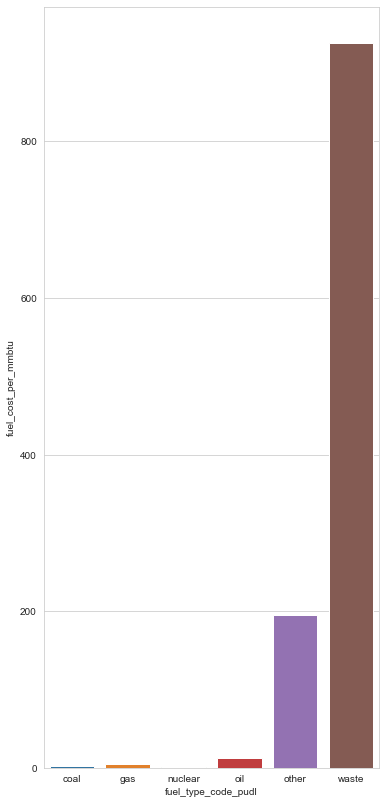

In [88]:
plt.figure(figsize=(6,14))
sns.barplot(x='fuel_type_code_pudl', y='fuel_cost_per_mmbtu',data=group_by_fuel)

Above plot shows that the average cost per unit energy of waste is the highest and nuclear & coal are the lowest. Why then is Nuclear or Coal not the most used source of energy since it is the cheapest. From a previous plot, we found the most burned fuel to be Gas. Let's find more answer in the dataset.

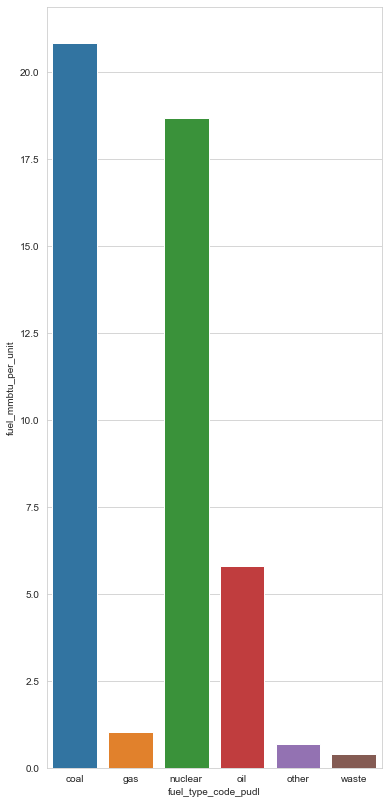

In [91]:
plt.figure(figsize=(6,14))
sns.barplot(x='fuel_type_code_pudl', y='fuel_mmbtu_per_unit',data=group_by_fuel)

The above plot further shows the average measure of energy per unit for each fuel. We can see that for a unit of fuel, coal and nuclear release high amount of energy. The corroborate with the plot that shows that nuclear and coal are the cheapest source of energy. It further support the need to find out why these fuels are not most used.
Though coal remained the second most burned fuel yearly, it's yearly amount burned reduces every year despite the fact that it is cheap and releases considerable amount of energy.

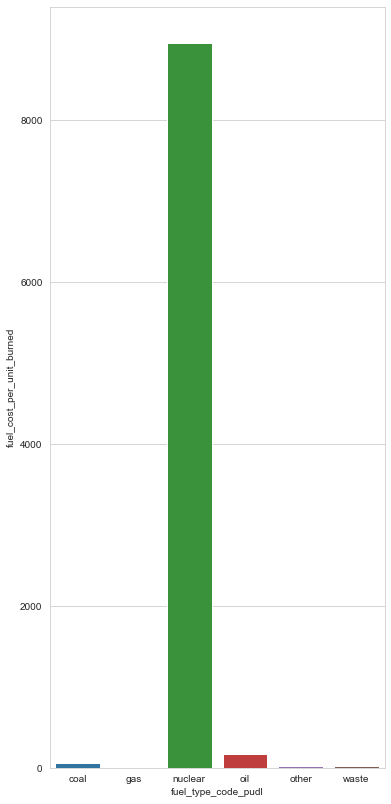

In [92]:
plt.figure(figsize=(6,14))
sns.barplot(x='fuel_type_code_pudl', y='fuel_cost_per_unit_burned',data=group_by_fuel)

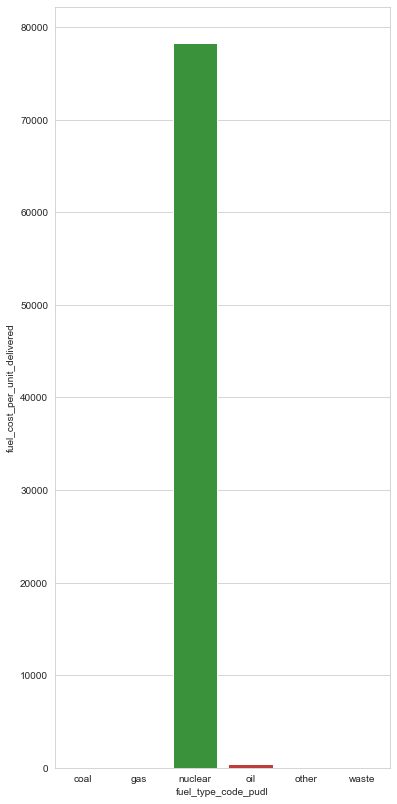

In [93]:
plt.figure(figsize=(6,14))
sns.barplot(x='fuel_type_code_pudl', y='fuel_cost_per_unit_delivered',data=group_by_fuel)

The two plots above shows how it is very expensive to deliver and burn a nuclear fuel. This can be one of the reasons why the nuclear fuel is not highly burned despite the fact that it releases the most amount of energy per unit.

Coal usage is descreasing every year. This may be attributed to the increase concern about the effect of burning coal on climate change. There are also concerns about the effect of the radioactive waste from nuclear fuel. This has also contributed to the low demand for nuclear.


In [94]:
data


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [97]:
corr = data.corr()

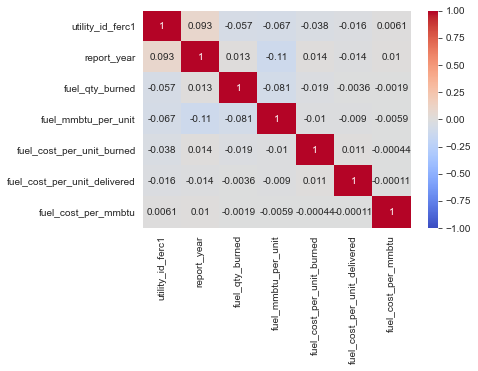

In [106]:
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0)

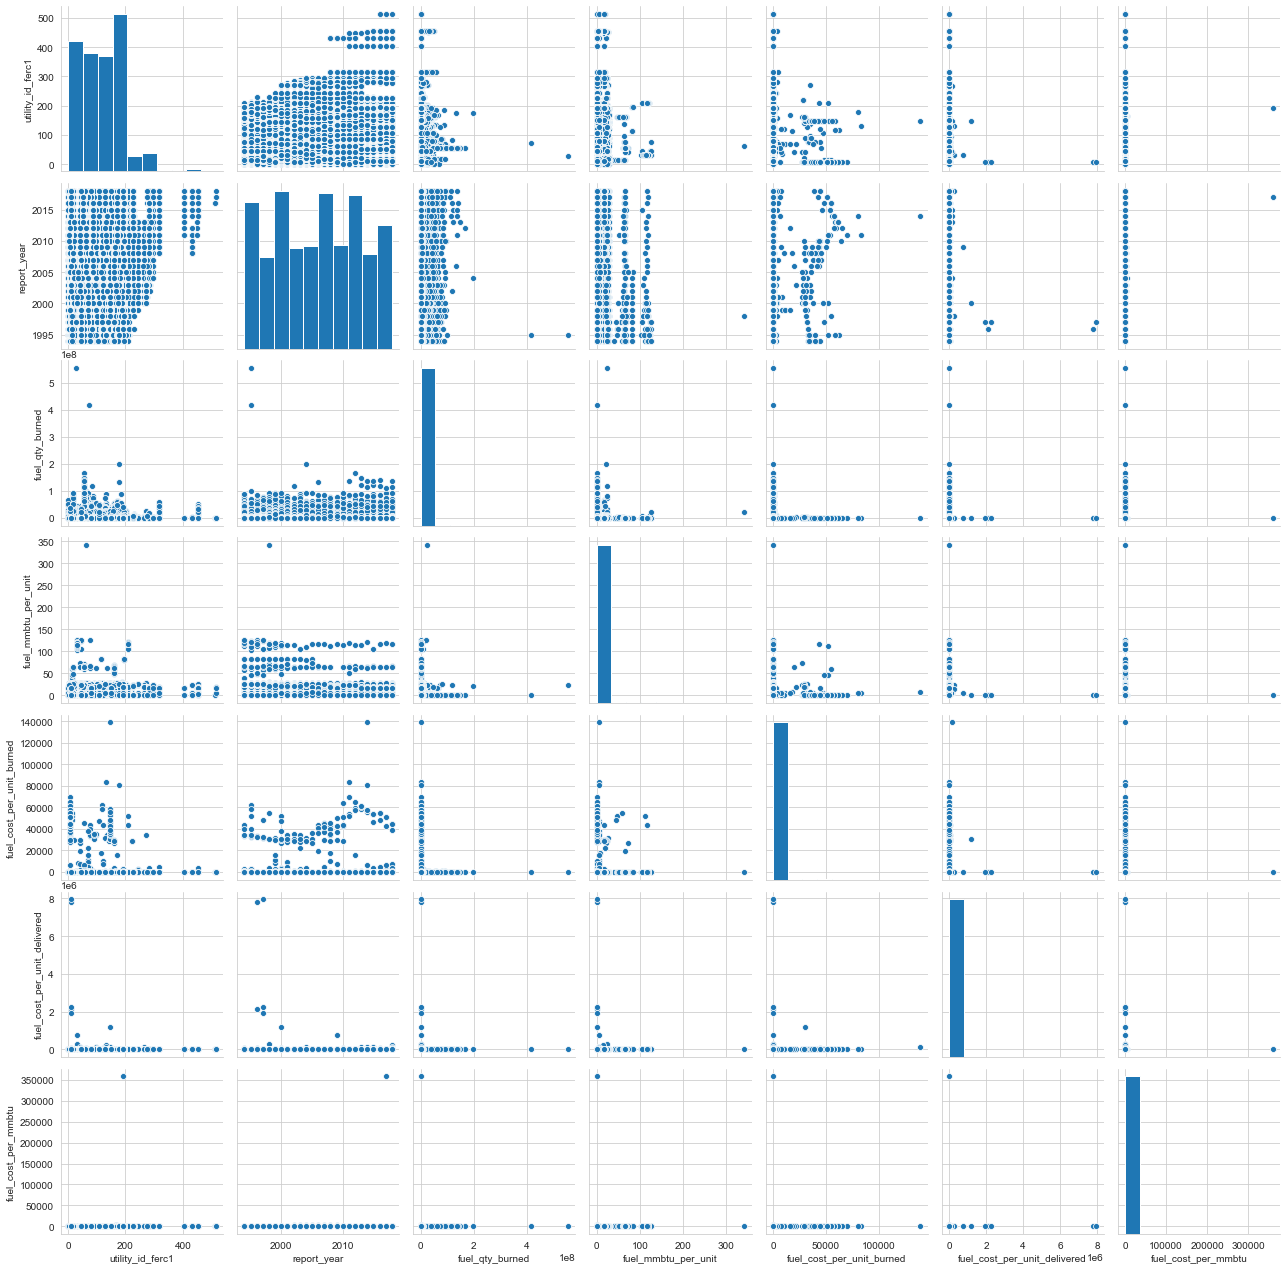

In [107]:
sns.pairplot(data)

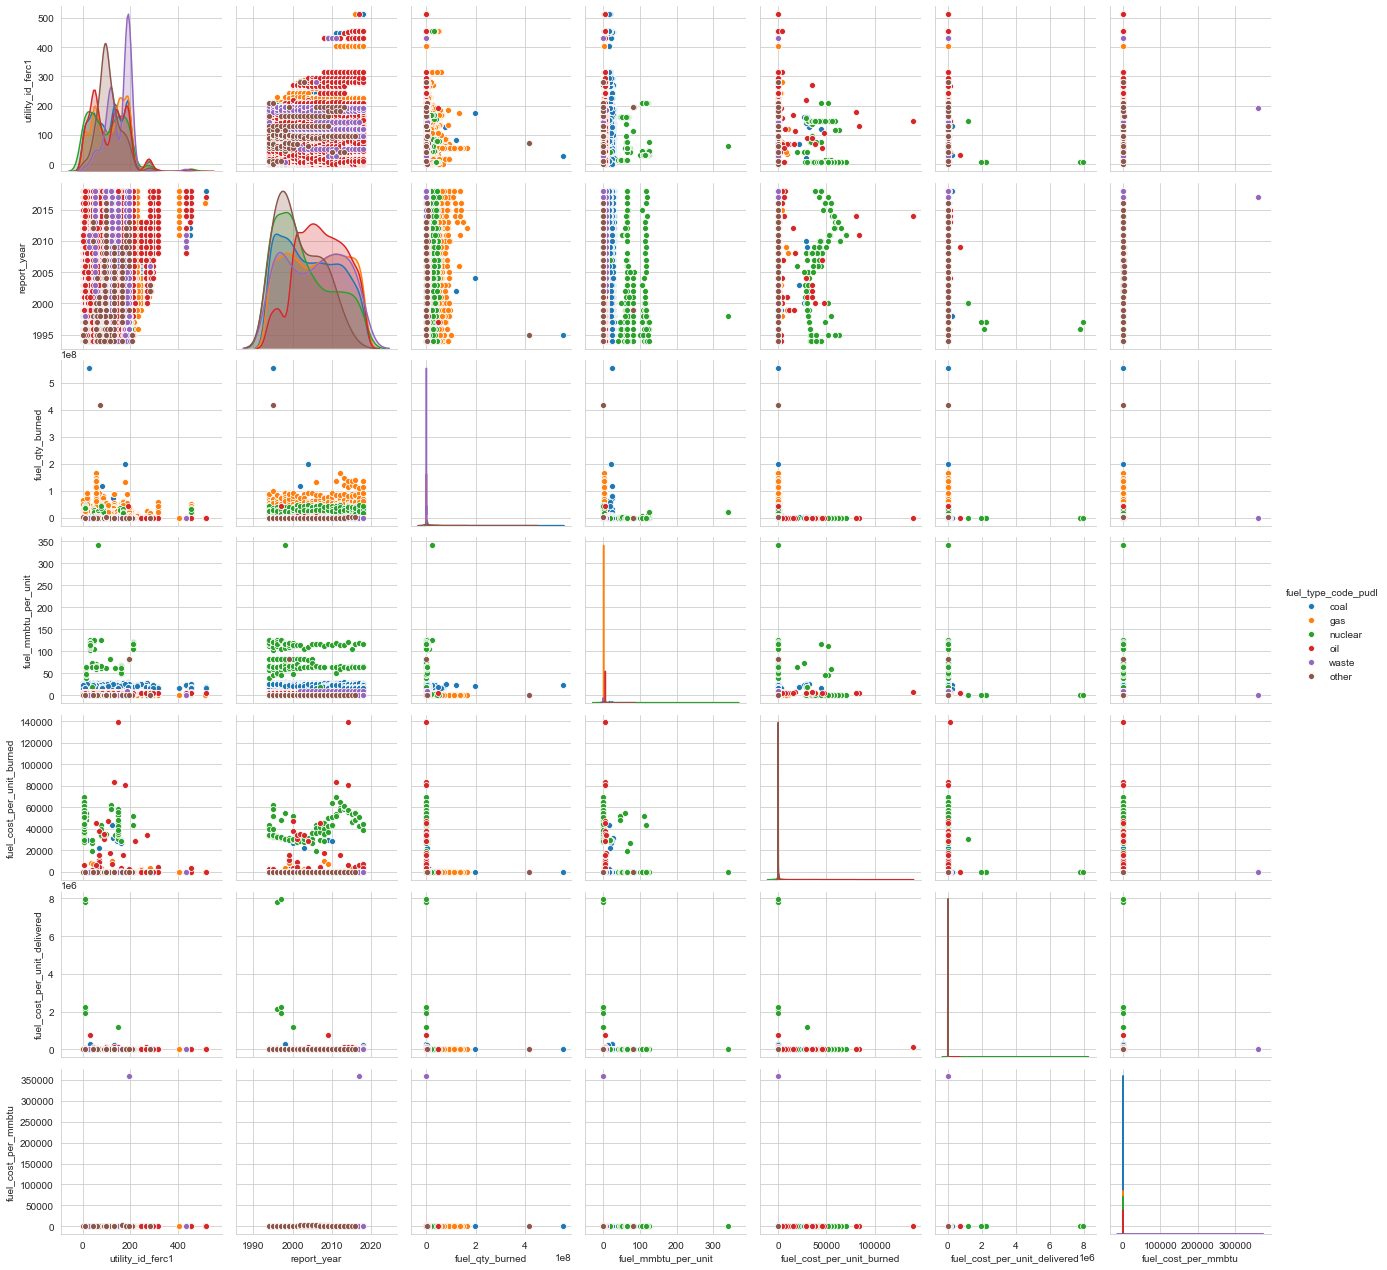

In [109]:
sns.pairplot(data, hue='fuel_type_code_pudl')

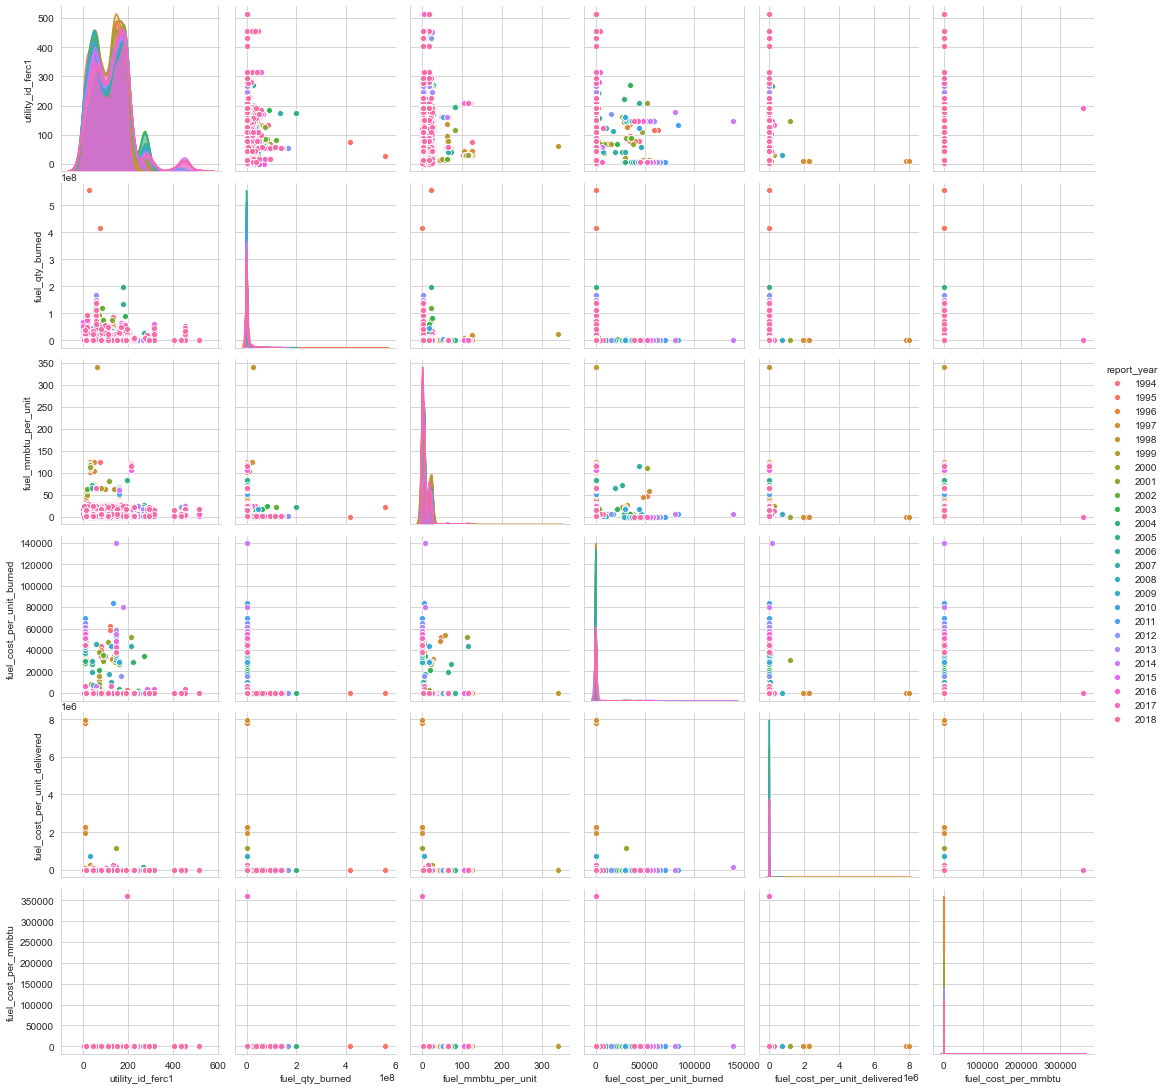

In [108]:
sns.pairplot(data, hue='report_year')